In [2]:
import pandas as pd
import numpy as np

In [3]:
datos = pd.read_csv("../Descriptores moleculares/df_final.csv")

In [4]:
datos.head()

,SMILES,BBB+/BBB-,mol,PEOE_VSA1,PEOE_VSA10,MolLogP,fr_Al_COO,VSA_EState3,MolWt,VSA_EState5,...,VSA_EState8,VSA_EState9,EState_VSA6,EState_VSA2,NumRotatableBonds,fr_sulfide,PEOE_VSA2,VSA_EState1,PEOE_VSA3,SlogP_VSA1
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68BE...,10.213055,17.130826,3.70160,0.0,26.303413,398.400,-1.459482,...,0.000000,-3.794932,12.132734,27.713696,6.0,0.0,4.722095,27.043745,18.196313,4.722095
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,30.110097,11.446551,-1.12770,2.0,42.617118,520.480,-6.727209,...,-0.212637,2.713449,7.047672,34.942843,9.0,1.0,19.283521,12.373365,9.476340,5.316789
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,5.106527,5.516701,3.19840,0.0,11.049768,305.502,0.195000,...,0.000000,0.000000,18.329578,5.749512,0.0,0.0,4.983979,0.716481,0.000000,0.000000
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,5.316789,0.000000,2.11348,0.0,14.049697,342.266,2.258420,...,3.356741,0.000000,17.958729,0.000000,6.0,1.0,15.293172,1.032858,0.000000,10.633577
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,<rdkit.Chem.rdchem.Mol object at 0x000001D68B7...,44.643136,30.519832,-1.23650,1.0,50.605687,461.467,-0.624725,...,0.861482,2.116076,12.142387,17.709259,3.0,0.0,0.000000,17.522416,4.794537,9.473726


In [5]:
datos.shape

(7807, 41)

In [6]:
datos["BCUT2D_MWHI"].fillna(datos["BCUT2D_MWHI"].mean(), inplace=True)

C:\Users\Eliud\AppData\Local\Temp\ipykernel_5764\1269603426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos["BCUT2D_MWHI"].fillna(datos["BCUT2D_MWHI"].mean(), inplace=True)


In [7]:
def color(bbb):
    if bbb == "BBB-":
        return "#E03611"
    else:
        return "#11B7E0"

In [8]:
datos["color"] = datos["BBB+/BBB-"].apply(color)

# PCA
<hr>

In [9]:
X = datos.drop(columns=["SMILES", "BBB+/BBB-", "mol", "color"]).copy()
y = datos["BBB+/BBB-"].copy()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
X_scaled = scaler.fit_transform(X)

In [11]:
modelo = PCA(n_components=2)

In [12]:
modelo.fit(X_scaled)

PCA(n_components=2)

In [13]:
variables = modelo.transform(X_scaled)

In [14]:
variables

array([[ 0.16073927, -1.35524597],
       [ 4.32065308, -3.25088161],
       [-3.11304305, -1.43722972],
       ...,
       [-2.24164083,  1.10411711],
       [-2.98698937, -1.16205771],
       [-3.06600691, -1.47926702]])

In [15]:
import numpy as np
# Obtener la proporción de varianza explicada por cada componente principal
explained_variance_ratio = modelo.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Mostrar la varianza explicada y la varianza acumulada
print("Varianza explicada por cada componente principal:", explained_variance_ratio)
print("Varianza acumulada:", cumulative_variance)

Varianza explicada por cada componente principal: [0.23193032 0.10917085]
Varianza acumulada: [0.23193032 0.34110117]


In [16]:
import matplotlib.pyplot as plt

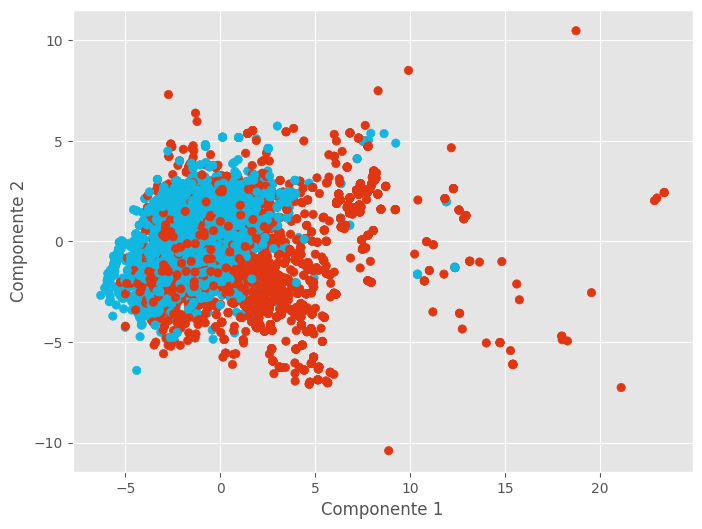

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.scatter(variables[:, 0], variables[:, 1], c = datos["color"])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)

In [18]:
modelo = PCA(n_components=20)

In [19]:
modelo.fit(X_scaled)

PCA(n_components=20)

In [20]:
import numpy as np
# Obtener la proporción de varianza explicada por cada componente principal
explained_variance_ratio = modelo.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)

# Mostrar la varianza explicada y la varianza acumulada
print("Varianza explicada por cada componente principal:", explained_variance_ratio)
print("Varianza acumulada:", cumulative_variance)

Varianza explicada por cada componente principal: [0.23193032 0.10917085 0.08362989 0.07375536 0.05945102 0.05061181
 0.03650101 0.03389874 0.02743563 0.02651676 0.02425316 0.02303122
 0.02132798 0.01797314 0.01684012 0.01522514 0.01386822 0.01324931
 0.01250496 0.01194192]
Varianza acumulada: [0.23193032 0.34110117 0.42473106 0.49848642 0.55793744 0.60854926
 0.64505026 0.67894901 0.70638464 0.7329014  0.75715456 0.78018578
 0.80151376 0.8194869  0.83632702 0.85155216 0.86542038 0.87866969
 0.89117465 0.90311658]


# Algoritmo SVC con PCA y rejilla
<hr>

In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  # 'scaler' debe estar entre paréntesis
    ('svc', SVC(max_iter=1500000))
])

In [127]:
param_grid = {
    'svc__C': [1, 10, 100, 1000],
    'svc__gamma': [1, 0.1, 0.001],
    'svc__kernel': ['rbf', 'sigmoid'],
    'svc__class_weight' : [None, "balanced"]
}

In [132]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs= 10)

In [133]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(max_iter=1500000))]),
             n_jobs=10,
             param_grid={'svc__C': [1, 10, 100, 1000],
                         'svc__class_weight': [None, 'balanced'],
                         'svc__gamma': [1, 0.1, 0.001],
                         'svc__kernel': ['rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [134]:
grid_search.best_params_

{'svc__C': 10,
 'svc__class_weight': None,
 'svc__gamma': 0.1,
 'svc__kernel': 'rbf'}

In [135]:
grid_search.best_score_

0.8797437950360288

In [137]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=10, gamma=0.1, kernel="rbf", probability=True, class_weight="balanced"))
])

In [138]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=10, class_weight='balanced', gamma=0.1,
                     probability=True))])

In [139]:
y_predicha = pipe.predict(X_test)

In [140]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.877
Recall 0.877
precision 0.878
f1 0.878


In [141]:
y_entrenamiento = pipe.predict(X_train)

In [142]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.98
Recall 0.98
precision 1.0
f1 0.98
